In [ ]:
pip install pyod

In [ ]:
pip install --upgrade pyod

Task 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("anomaly_data.csv", index_col=0)
print(df.head())

print("Number of instances:", df.shape[0])
print("Number of attributes:", df.shape[1] - 1)

         X0        X1    y
0  6.433659  5.509168  0.0
1  5.044698  7.708065  0.0
2  5.924536  5.259220  0.0
3  5.293991  5.671262  0.0
4  5.615091  6.130929  0.0
Number of instances: 1200
Number of attributes: 2



Number of instances in each class:
y
0.0    960
1.0    240
Name: count, dtype: int64


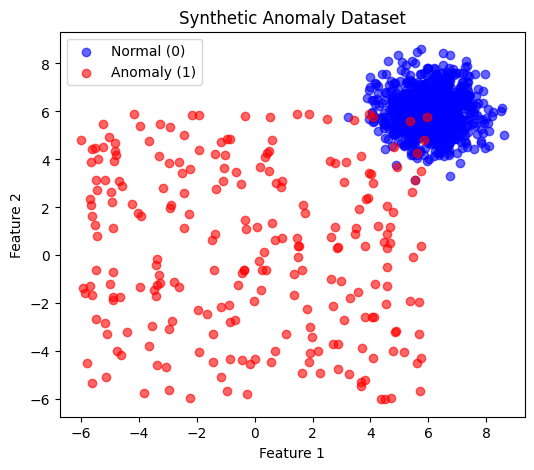

In [ ]:
print("\nNumber of instances in each class:")
print(df.iloc[:, -1].value_counts())

X, y = df.iloc[:, :2], df.iloc[:, -1]

plt.figure(figsize=(6, 5))
plt.scatter(X[y == 0].iloc[:, 0], X[y == 0].iloc[:, 1],
            c="blue", label="Normal (0)", alpha=0.6)
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1],
            c="red", label="Anomaly (1)", alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Synthetic Anomaly Dataset")
plt.show()


Task 1

In [ ]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [ ]:
clf = KNN(n_neighbors=10, method="largest", metric="euclidean")
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='euclidean', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

In [ ]:
y_test_scores = clf.decision_function(X_test)
y_test_pred = clf.predict(X_test)

In [ ]:
roc = roc_auc_score(y_test, y_test_scores)
ap = average_precision_score(y_test, y_test_scores)

print("ROC-AUC Score:", roc)
print("Average Precision Score:", ap)

ROC-AUC Score: 0.9980133462380928
Average Precision Score: 0.9928058217036719


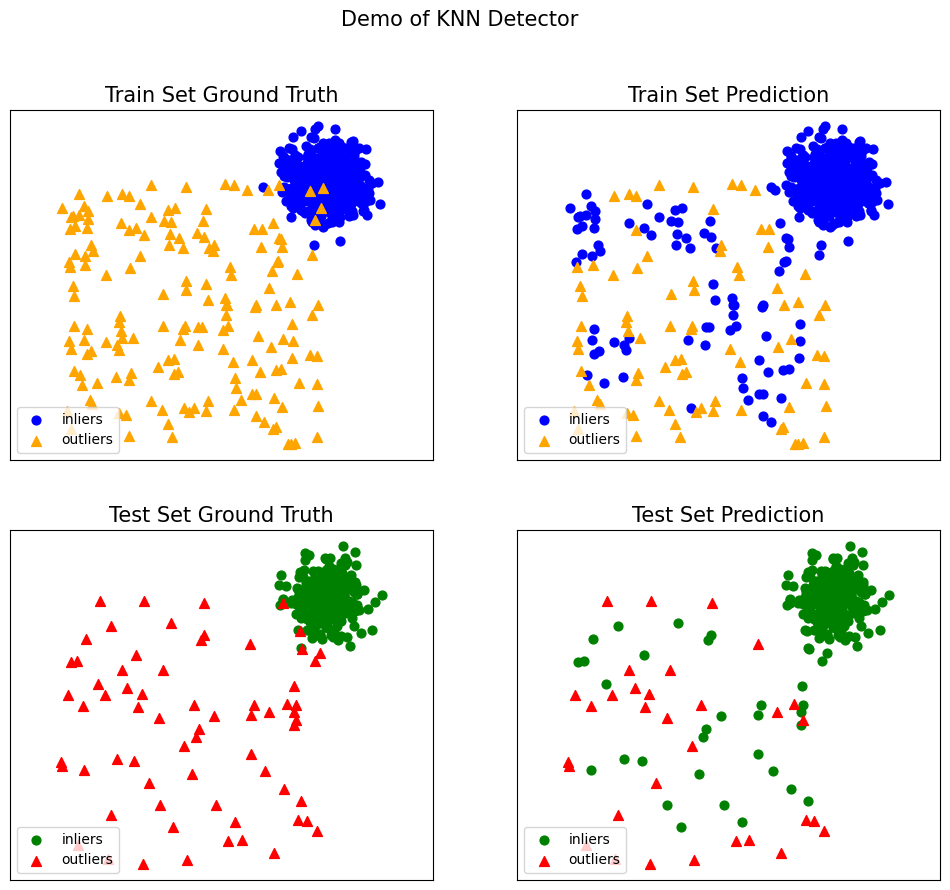

In [ ]:
visualize("KNN",
          X_train, y_train,
          X_test, y_test,
          clf.labels_,
          y_test_pred,
          show_figure=True, save_figure=False)

Task 2

In [ ]:
from pyod.models.knn import KNN
from sklearn.metrics import roc_auc_score, average_precision_score

k_values = range(2, 21, 2)   # 2, 4, 6, ..., 20
methods = ["largest", "mean", "median"]

results = []

for k in k_values:
    for method in methods:
        clf = KNN(n_neighbors=k, method=method, metric="euclidean")
        clf.fit(X_train)

        y_test_scores = clf.decision_function(X_test)
        y_test_pred = clf.predict(X_test)

        roc = roc_auc_score(y_test, y_test_scores)
        ap = average_precision_score(y_test, y_test_scores)

        results.append({
            "n_neighbors": k,
            "method": method,
            "ROC-AUC": roc,
            "Average Precision": ap
        })

In [ ]:
results_df = pd.DataFrame(results)

print("=== Results (sorted by ROC-AUC) ===")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

best_roc = results_df.loc[results_df["ROC-AUC"].idxmax()]
best_ap = results_df.loc[results_df["Average Precision"].idxmax()]

print("\nBest by ROC-AUC:", best_roc.to_dict())
print("Best by Average Precision:", best_ap.to_dict())

=== Results (sorted by ROC-AUC) ===
    n_neighbors   method   ROC-AUC  Average Precision
21           16  largest  0.998472           0.994368
20           14   median  0.998268           0.993556
23           16   median  0.998166           0.993188
18           14  largest  0.998166           0.993350
9             8  largest  0.998166           0.993193
26           18   median  0.998166           0.993293
27           20  largest  0.998115           0.993359
28           20     mean  0.998115           0.993298
25           18     mean  0.998064           0.993168
29           20   median  0.998064           0.993001
24           18  largest  0.998064           0.993069
22           16     mean  0.998013           0.992961
15           12  largest  0.998013           0.992782
12           10  largest  0.998013           0.992806
19           14     mean  0.997911           0.992709
16           12     mean  0.997759           0.992276
17           12   median  0.997657           0

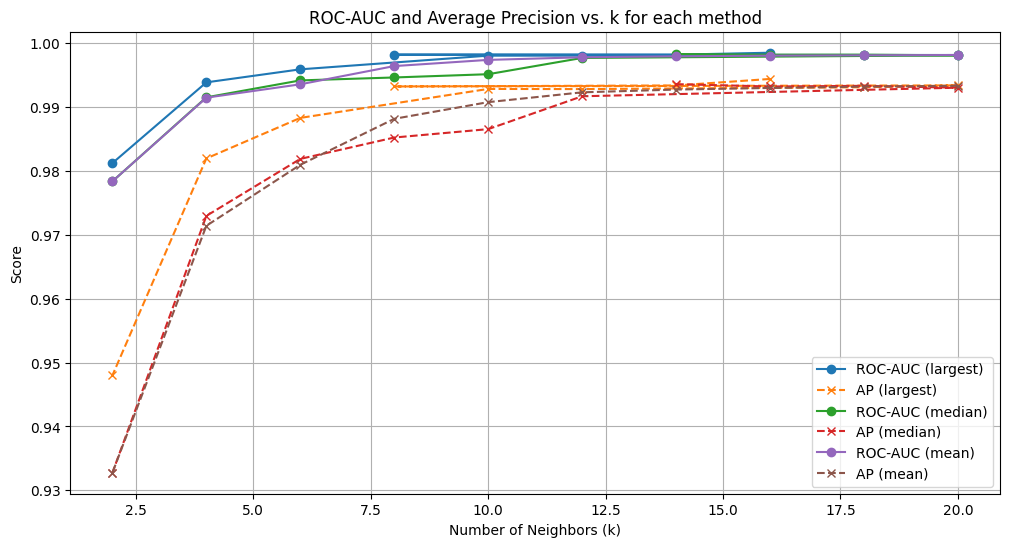

In [ ]:
data = {
    "n_neighbors": [16, 14, 16, 14, 8, 18, 20, 20, 18, 20, 18, 16, 12, 10, 14, 12, 12, 10, 8, 6, 10, 8, 6, 4, 6, 4, 4, 2, 2, 2],
    "method": ["largest", "median", "median", "largest", "largest", "median", "largest", "mean", "mean", "median",
               "largest", "mean", "largest", "largest", "mean", "mean", "median", "mean", "mean", "largest",
               "median", "median", "median", "largest", "mean", "median", "mean", "largest", "mean", "median"],
    "ROC-AUC": [0.998472, 0.998268, 0.998166, 0.998166, 0.998166, 0.998166, 0.998115, 0.998115, 0.998064, 0.998064,
                0.998064, 0.998013, 0.998013, 0.998013, 0.997911, 0.997759, 0.997657, 0.997351, 0.996383, 0.995874,
                0.995110, 0.994600, 0.994142, 0.993836, 0.993531, 0.991493, 0.991442, 0.981203, 0.978351, 0.978351],
    "Average Precision": [0.994368, 0.993556, 0.993188, 0.993350, 0.993193, 0.993293, 0.993359, 0.993298, 0.993168, 0.993001,
                          0.993069, 0.992961, 0.992782, 0.992806, 0.992709, 0.992276, 0.991661, 0.990741, 0.988130, 0.988275,
                          0.986517, 0.985204, 0.981859, 0.981934, 0.980940, 0.972946, 0.971396, 0.947992, 0.932762, 0.932762]
}

df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

for method in df['method'].unique():
    subset = df[df['method'] == method]
    plt.plot(subset['n_neighbors'], subset['ROC-AUC'], marker='o', label=f'ROC-AUC ({method})')
    plt.plot(subset['n_neighbors'], subset['Average Precision'], marker='x', linestyle='--', label=f'AP ({method})')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("ROC-AUC and Average Precision vs. k for each method")
plt.legend()
plt.grid(True)
plt.show()


Task 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize
from pyod.models.lof import LOF

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

clf = LOF(n_neighbors=10,metric="euclidean")
clf.fit(X_train)

y_test_scores = clf.decision_function(X_test)  # outlier scores
y_test_pred = clf.predict(X_test)

roc = roc_auc_score(y_test, y_test_scores)
ap = average_precision_score(y_test, y_test_scores)

print("ROC-AUC Score:", roc)
print("Average Precision Score:", ap)


ROC-AUC Score: 0.48311344302378895
Average Precision Score: 0.21031517550206136


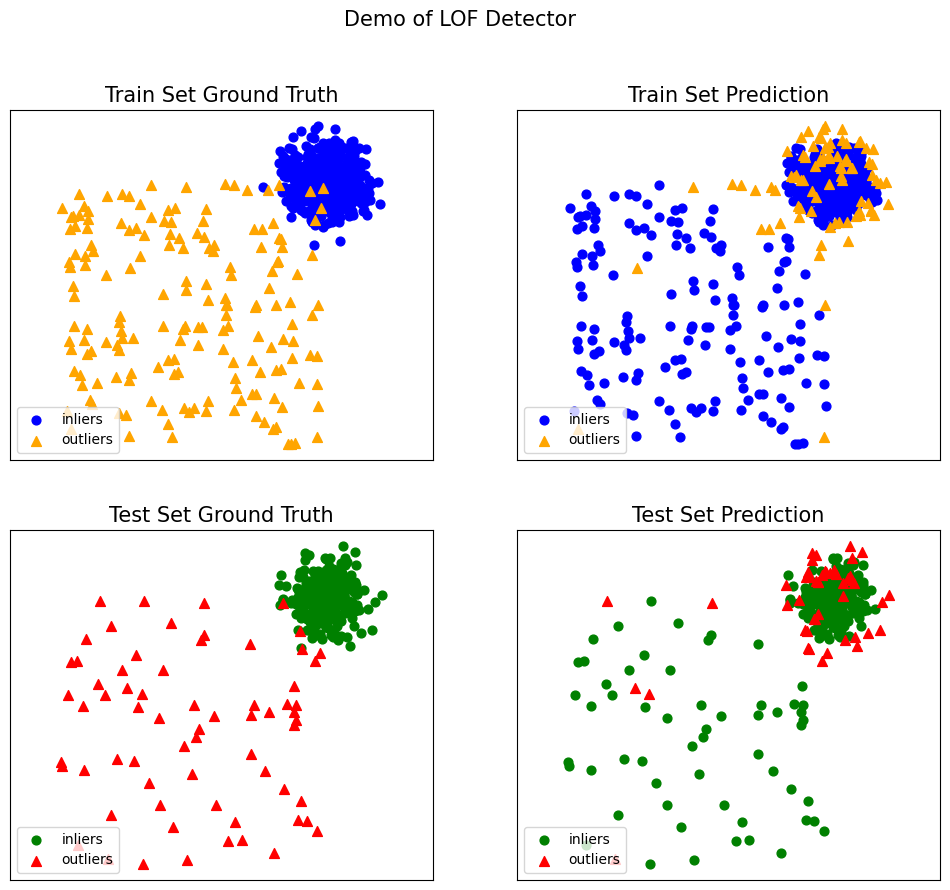

In [ ]:
visualize("LOF",
          X_train, y_train,
          X_test, y_test,
          clf.labels_,  # predicted labels for train
          y_test_pred,
          show_figure=True, save_figure=False)

In [ ]:
k_values = range(2, 21, 2)

results = []

for k in k_values:
    for method in methods:
        clf = LOF(n_neighbors=k, metric="euclidean")
        clf.fit(X_train)

        y_test_scores = clf.decision_function(X_test)
        y_test_pred = clf.predict(X_test)

        roc = roc_auc_score(y_test, y_test_scores)
        ap = average_precision_score(y_test, y_test_scores)

        results.append({
            "n_neighbors": k,
            "method": method,
            "ROC-AUC": roc,
            "Average Precision": ap
        })

In [ ]:
results_df = pd.DataFrame(results)

print("=== Results (sorted by ROC-AUC) ===")
print(results_df.sort_values(by="ROC-AUC", ascending=False))

best_roc = results_df.loc[results_df["ROC-AUC"].idxmax()]
best_ap = results_df.loc[results_df["Average Precision"].idxmax()]

print("\nBest by ROC-AUC:", best_roc.to_dict())
print("Best by Average Precision:", best_ap.to_dict())

=== Results (sorted by ROC-AUC) ===
    n_neighbors   method   ROC-AUC  Average Precision
10            8     mean  0.524935           0.232370
9             8  largest  0.524935           0.232370
11            8   median  0.524935           0.232370
6             6  largest  0.498905           0.228622
7             6     mean  0.498905           0.228622
8             6   median  0.498905           0.228622
12           10  largest  0.483113           0.210315
13           10     mean  0.483113           0.210315
14           10   median  0.483113           0.210315
3             4  largest  0.470124           0.200429
5             4   median  0.470124           0.200429
4             4     mean  0.470124           0.200429
0             2  largest  0.439203           0.174166
2             2   median  0.439203           0.174166
1             2     mean  0.439203           0.174166
15           12  largest  0.415924           0.194862
16           12     mean  0.415924           0

Task 4

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM

df = pd.read_csv("cardio.csv")
X = df.drop(columns=['y']).values
y = df['y'].astype(int).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

iforest = IForest(random_state=42)
iforest.fit(X_train)
y_if_scores = iforest.decision_function(X_test)

roc_if = roc_auc_score(y_test, y_if_scores)
ap_if = average_precision_score(y_test, y_if_scores)
print("Isolation Forest with PCA - ROC-AUC:", roc_if, "AP:", ap_if)

ocsvm = OCSVM()
ocsvm.fit(X_train)
y_svm_scores = ocsvm.decision_function(X_test)

roc_svm = roc_auc_score(y_test, y_svm_scores)
ap_svm = average_precision_score(y_test, y_svm_scores)
print("One-Class SVM with PCA - ROC-AUC:", roc_svm, "AP:", ap_svm)

results_df = pd.DataFrame({
    "Model": ["IsolationForest_PCA", "OneClassSVM_PCA"],
    "ROC-AUC": [roc_if, roc_svm],
    "Average Precision": [ap_if, ap_svm]
})
print("\n=== Summary Results with PCA ===")
print(results_df)


Isolation Forest with PCA - ROC-AUC: 0.9456740442655935 AP: 0.6957561579237065
One-Class SVM with PCA - ROC-AUC: 0.9142401579287043 AP: 0.5043571514900891

=== Summary Results with PCA ===
                 Model   ROC-AUC  Average Precision
0  IsolationForest_PCA  0.945674           0.695756
1      OneClassSVM_PCA  0.914240           0.504357


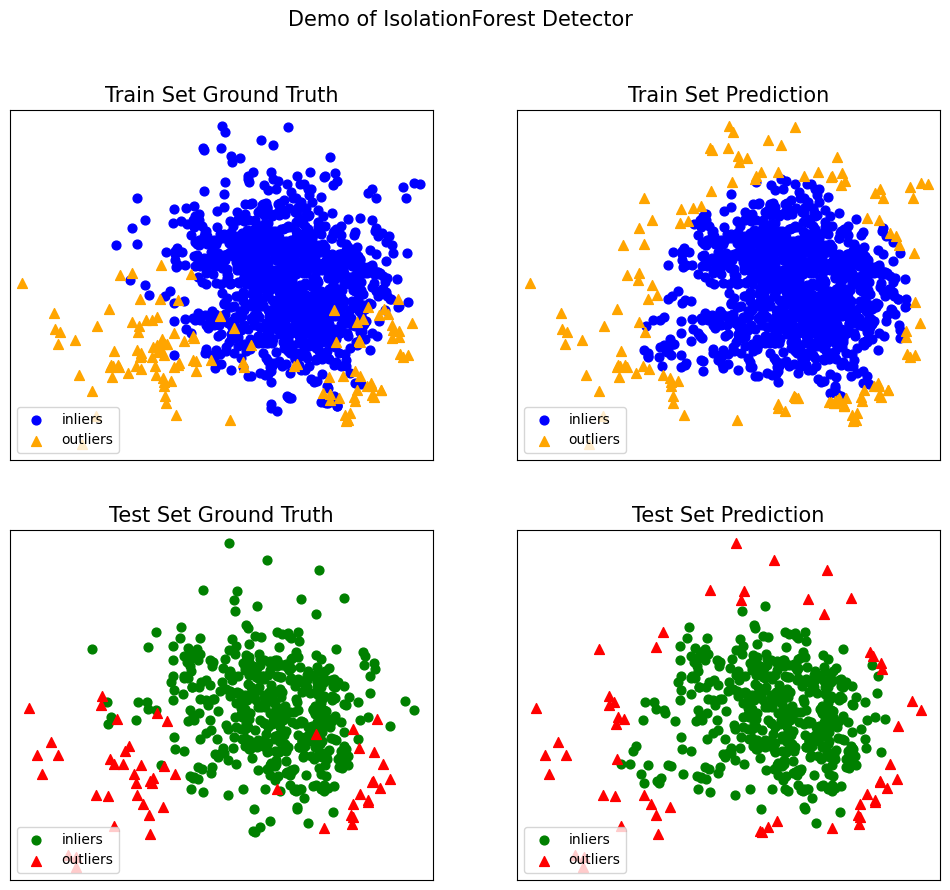

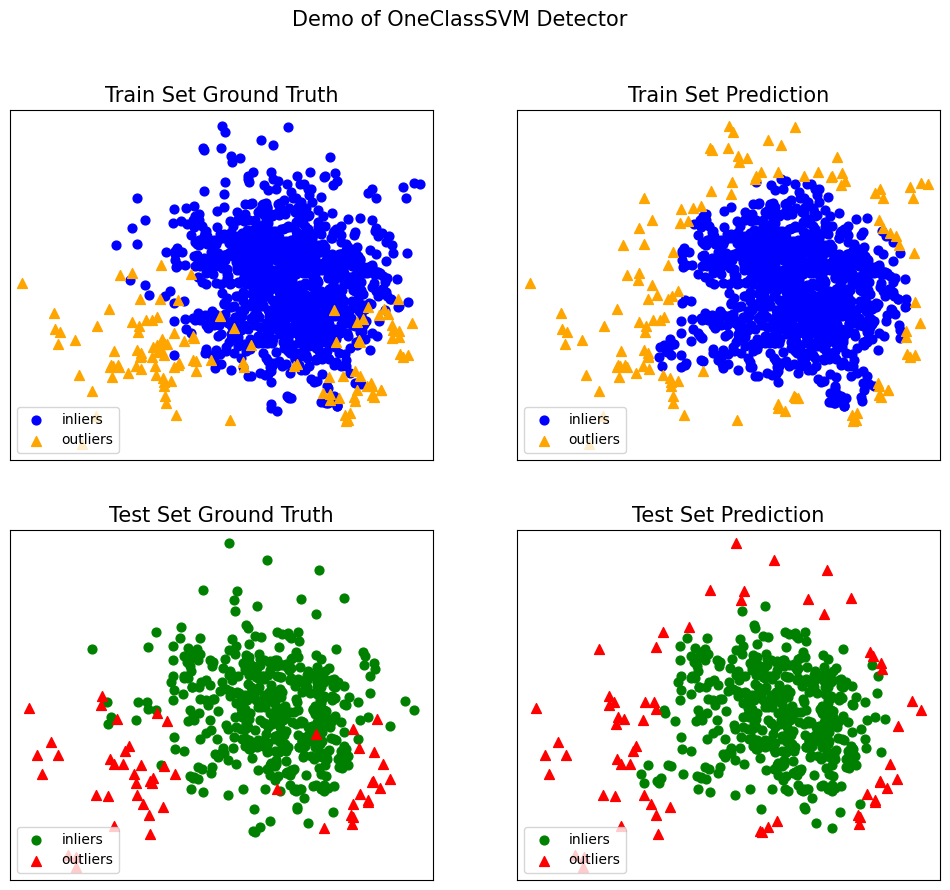

In [ ]:
pca_2d = PCA(n_components=2, random_state=42)
X_scaled_2d = pca_2d.fit_transform(X_scaled)
X_train_2d, X_test_2d, y_train_viz, y_test_viz = train_test_split(
    X_scaled_2d, y, test_size=0.3, random_state=42, stratify=y
)

iforest_2d = IForest(random_state=42)
iforest_2d.fit(X_train_2d)
y_test_pred_if = iforest_2d.predict(X_test_2d)

visualize("IsolationForest",
          X_train_2d, y_train_viz,
          X_test_2d, y_test_viz,
          iforest_2d.labels_,
          y_test_pred_if,
          show_figure=True,
          save_figure=False)

ocsvm_2d = OCSVM()
ocsvm_2d.fit(X_train_2d)
y_test_pred_svm = ocsvm_2d.predict(X_test_2d)

visualize("OneClassSVM",
          X_train_2d, y_train_viz,
          X_test_2d, y_test_viz,
          ocsvm_2d.labels_,
          y_test_pred_svm,
          show_figure=True,
          save_figure=False)

In [ ]:
from pyod.models.lof import LOF
from sklearn.metrics import roc_auc_score, average_precision_score

lof = LOF(n_neighbors=10)
lof.fit(X_train)

y_lof_scores = lof.decision_function(X_test)
roc_lof = roc_auc_score(y_test, y_lof_scores)
ap_lof = average_precision_score(y_test, y_lof_scores)

print("LOF with PCA - ROC-AUC:", roc_lof, "AP:", ap_lof)

LOF with PCA - ROC-AUC: 0.592194677498956 AP: 0.19816026351450497


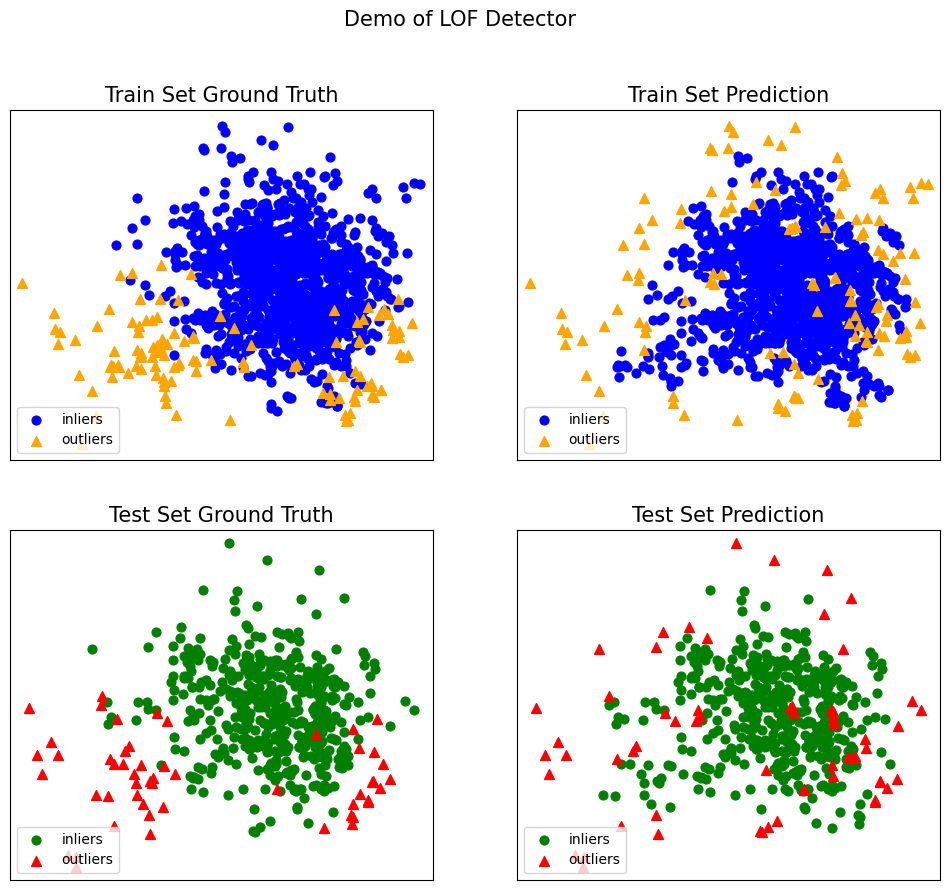

In [ ]:
pca_2d = PCA(n_components=2, random_state=42)
X_scaled_2d = pca_2d.fit_transform(X_scaled)
X_train_2d, X_test_2d, y_train_viz, y_test_viz = train_test_split(
    X_scaled_2d, y, test_size=0.3, random_state=42, stratify=y
)

lof_2d = LOF(n_neighbors=10)
lof_2d.fit(X_train_2d)
y_test_pred_lof = lof_2d.predict(X_test_2d)

visualize("LOF",
          X_train_2d, y_train_viz,
          X_test_2d, y_test_viz,
          lof_2d.labels_,
          y_test_pred_lof,
          show_figure=True,
          save_figure=False)
